In [1]:
!pip install matplotlib
!pip install seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import json
import base64
from datetime import datetime

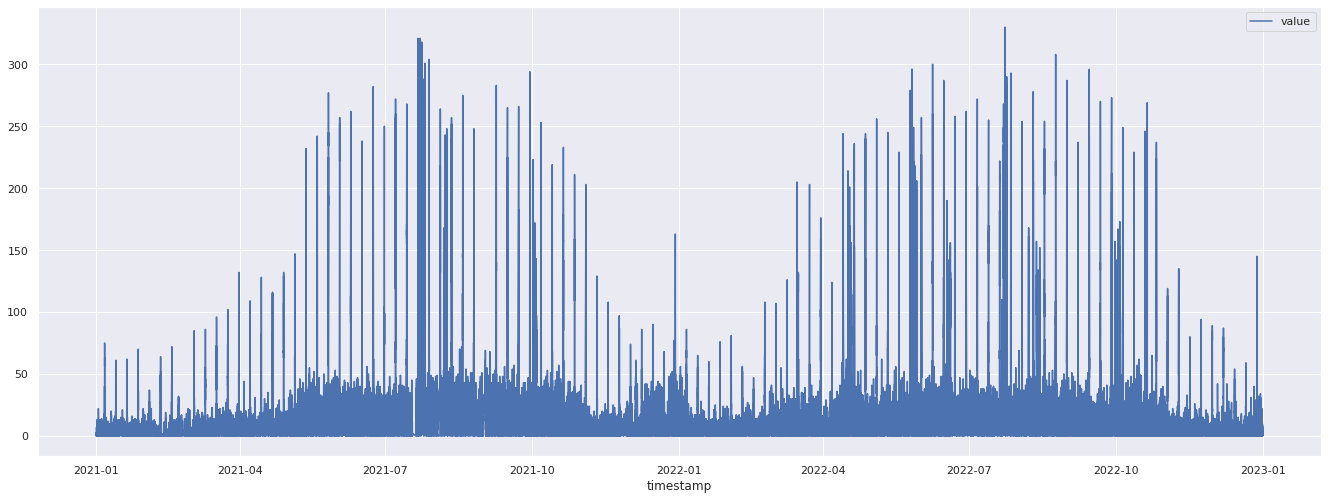

In [2]:
dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv("persons.csv", dtype = {'value': float}, parse_dates=[0], date_parser=dateparse,)
df.set_index('timestamp', inplace=True)
sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(23,8.27)})
lp = sns.lineplot(data=df)

In [3]:
figfn = "timeseries.png"
fig = lp.get_figure()
fig.savefig(figfn)
encoded_str = None
with open(figfn, 'rb') as f:
    encoded_str = base64.b64encode(f.read())
    encoded_str = encoded_str.decode('utf-8')

metadata = {
     'outputs' :  [{
        'type': 'web-app',
        'storage': 'inline',
        'source': "<img src='data:image/png;base64,"+encoded_str+"'/>",
    }]
}

with open("mlpipeline-ui-metadata.json", "w", encoding="utf-8") as metadata_file:
    json.dump(metadata, metadata_file)